In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 7.7 MB/s eta 0:00:00


In [2]:
import zipfile
import os

In [3]:

# Ruta del archivo ZIP
zip_path = '/content/archive.zip'
# Ruta donde se extraerá (nueva carpeta)
extract_folder = '/content/data'  # Especifica la carpeta donde quieres extraer
# Verifica si la carpeta destino existe y si no, la crea
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)
# Descomprime el archivo ZIP en la nueva carpeta
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)


### PRUEBA CON MODELO YOLOV8

In [4]:
from ultralytics import YOLO

# Cargado del modelo preentrenado YOLOv8
model = YOLO('yolov8n-cls.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.31M/5.31M [00:00<00:00, 101MB/s]


In [5]:
# Entrenamiento
model.train(
    data='/content/data',  # Ruta de las carpetas 'train', 'valid', 'test'
    epochs=5,             # Número de épocas
    imgsz=128,             # Tamaño de las imágenes
    batch=16,              # Tamaño del batch
    project='runs/classify',  # Carpeta donde guardara los resultados
    name='wildfire_classification',  # Nombre del experimento
    pretrained=True        # Usa pesos preentrenados
)

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/data, epochs=5, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/classify, name=wildfire_classification, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

train: Scanning /content/data/train... 30249 images, 1 corrupt: 100%|██████████| 30250/30250 [00:09<00:00, 3186.12it/s]

train: WARNING ⚠️ /content/data/train/nowildfire/-114.152378,51.027198.jpg: ignoring corrupt image/label: image file is truncated (16 bytes not processed)


train: New cache created: /content/data/train.cache


val: Scanning /content/data/val... 6300 images, 0 corrupt: 100%|██████████| 6300/6300 [00:01<00:00, 3200.95it/s]

val: New cache created: /content/data/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 128 train, 128 val
Using 0 dataloader workers
Logging results to runs/classify/wildfire_classification
Starting training for 5 epochs...

      Epoch    GPU_mem       loss  Instances       Size


        1/5         0G      0.841         16        128:   0%|          | 2/1891 [00:01<17:07,  1.84it/s]

        1/5         0G     0.7953         16        128:   0%|          | 4/1891 [00:01<12:47,  2.46it/s]
100%|██████████| 755k/755k [00:00<00:00, 22.3MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 197/197 [00:54<00:00,  3.60it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 197/197 [00:53<00:00,  3.69it/s]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 197/197 [00:52<00:00,  3.74it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 197/197 [00:48<00:00,  4.08it/s]


                   all      0.981          1

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 197/197 [00:49<00:00,  3.97it/s]

                   all      0.983          1



5 epochs completed in 0.961 hours.
Optimizer stripped from runs/classify/wildfire_classification/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/wildfire_classification/weights/best.pt, 3.0MB

Validating runs/classify/wildfire_classification/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
train: /content/data/train... found 30250 images in 2 classes ✅ 
val: /content/data/val... found 6300 images in 2 classes ✅ 
test: /content/data/test... found 6300 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 197/197 [00:50<00:00,  3.91it/s]


                   all      0.983          1
Speed: 0.0ms preprocess, 4.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/wildfire_classification


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ec3811661a0>
curves: []
curves_results: []
fitness: 0.9913492202758789
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9826984405517578, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9913492202758789}
save_dir: PosixPath('runs/classify/wildfire_classification')
speed: {'preprocess': 0.0007997240339006696, 'inference': 4.668015033479721, 'loss': 8.174351283482142e-05, 'postprocess': 6.29349360390315e-05}
task: 'classify'
top1: 0.9826984405517578
top5: 1.0

In [6]:
import shutil

shutil.make_archive('/content/runsCompressed', 'zip', 'content/runs')

'/content/runsCompressed.zip'

In [7]:
from google.colab import files
files.download('/content/runsCompressed.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
from PIL import Image
import torch

# Cargar el modelo entrenado
best_model = YOLO('runs/classify/wildfire_classification/weights/best.pt')

# Cargar y procesa la imagen
image_path = '/content/data/val/wildfire/-57.25,51.51.jpg'
image = Image.open(image_path)

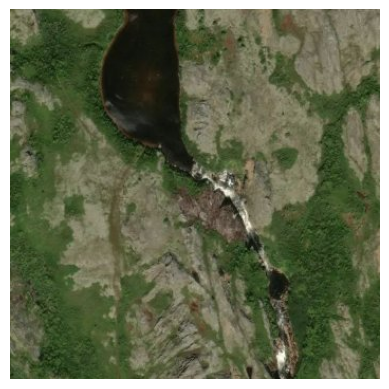

In [13]:
import matplotlib.pyplot as plt
import cv2

# Cargar la imagen
image_path = "/content/data/val/wildfire/-57.25,51.51.jpg"
image = cv2.imread(image_path)

# Convertir la imagen de BGR
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


In [10]:
# Realizar la inferencia
results = best_model(image)

# Obtener la clasificación
class_names = ['nowildfire', 'wildfire']
predicted_class = results[0].probs.top1
confidence = results[0].probs.top1conf.item()

print(f"Predicción: {class_names[predicted_class]} (Confianza: {confidence:.2f})")



0: 128x128 wildfire 0.97, nowildfire 0.03, 14.2ms
Speed: 10.7ms preprocess, 14.2ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)
Predicción: wildfire (Confianza: 0.97)
